<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/tutorial/Oct_17th_5th_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image registration

##1. Rigid transformation

In [3]:
#set-up
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import math

cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True) #cifar10 is a small pixel image dataset
sample_image, label = cifar10[0]  # 1st image in the dataset, you can choose whatever one
#Affine matrix = [a,b,tx]
####################[c,d,ty]
####################[0,0,1]

# Function to translate image
"""TRANSLATION MATRIX
[ 1, 0, tx ]
[ 0, 1, ty ]
[ 0, 0,  1 ]
"""
def translate_image(image, tx, ty):
    #https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.transform
    image_translation=image.transform(image.size, Image.AFFINE, (1, 0, tx, 0, 1, ty))
    return image_translation

# Function to rotate image
"""ROTATATION MATRIX
[ cos(θ), sin(θ), 0 ]
[-sin(θ), cos(θ), 0 ]
[   0,      0,    1 ]
"""
def rotate_image(image, angle):
    image_rotation = None#your input

    return image_rotation
# Function to scale image
"""SCALING MATRIX
[ sx, 0, 0 ]
[ 0, sy, 0 ]
[ 0,  0, 1 ]
"""
def scale_image(image, sx, sy):
    image_scaling =None#your input
    return image_scaling
# Function to shear image
"""SHEARING MATRIX
[ 1,  tan(θ), 0 ]
[ tan(θ), 1, 0 ]
[ 0,  0, 1 ]
"""
def shear_image(image, theta):
    image_shearing = None#your input
    return image_shearing


Files already downloaded and verified


TypeError: Image data of dtype object cannot be converted to float

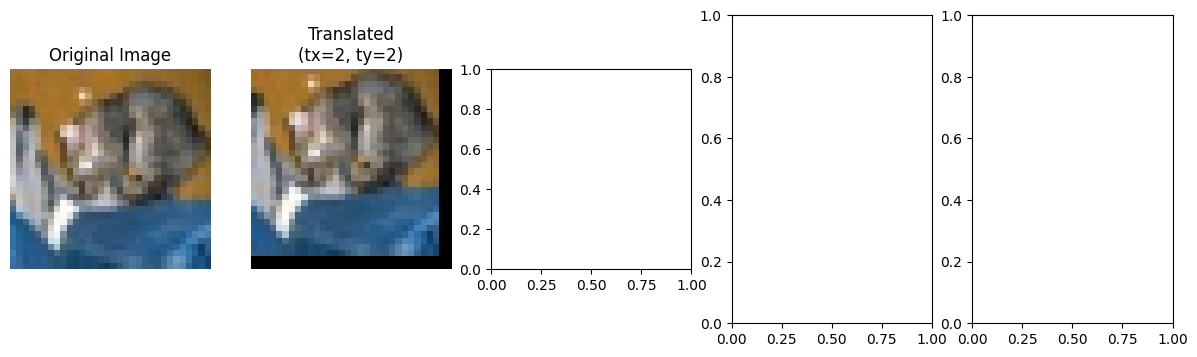

In [4]:
# costumize the translation
tx = 2
ty = 2
rotation_angle = 15
scale_factor_x = 2
scale_factor_y = 2
shear_factor = 30

# Convert sample image to PIL format
sample_image_pil = Image.fromarray(np.array(sample_image))

def scale_image_properly(image, sx, sy):
    new_width = int(image.width * sx)
    new_height = int(image.height * sy)
    return image.resize((new_width, new_height), Image.Resampling.LANCZOS)

# Apply transformations
translated_image = translate_image(sample_image_pil, tx, ty)
rotated_image = rotate_image(sample_image_pil, rotation_angle)
scaled_image = scale_image_properly(sample_image_pil, scale_factor_x, scale_factor_y)
sheared_image = shear_image(sample_image_pil, shear_factor)

# Display original and transformed images
fig, ax = plt.subplots(1, 5, figsize=(15, 4))

# Original Image
ax[0].imshow(sample_image_pil)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Translated Image
ax[1].imshow(translated_image)
ax[1].set_title(f"Translated\n(tx={tx}, ty={ty})")
ax[1].axis('off')

# Rotated Image
ax[2].imshow(rotated_image)
ax[2].set_title(f"Rotated\n(angle={rotation_angle}°)")
ax[2].axis('off')

# Scaled Image
ax[3].imshow(scaled_image)
ax[3].set_title(f"Scaled\n(sx={scale_factor_x}, sy={scale_factor_y})")
ax[3].axis('off')

# Sheared Image
ax[4].imshow(sheared_image)
ax[4].set_title(f"Sheared\n(θ={shear_factor}°)")
ax[4].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


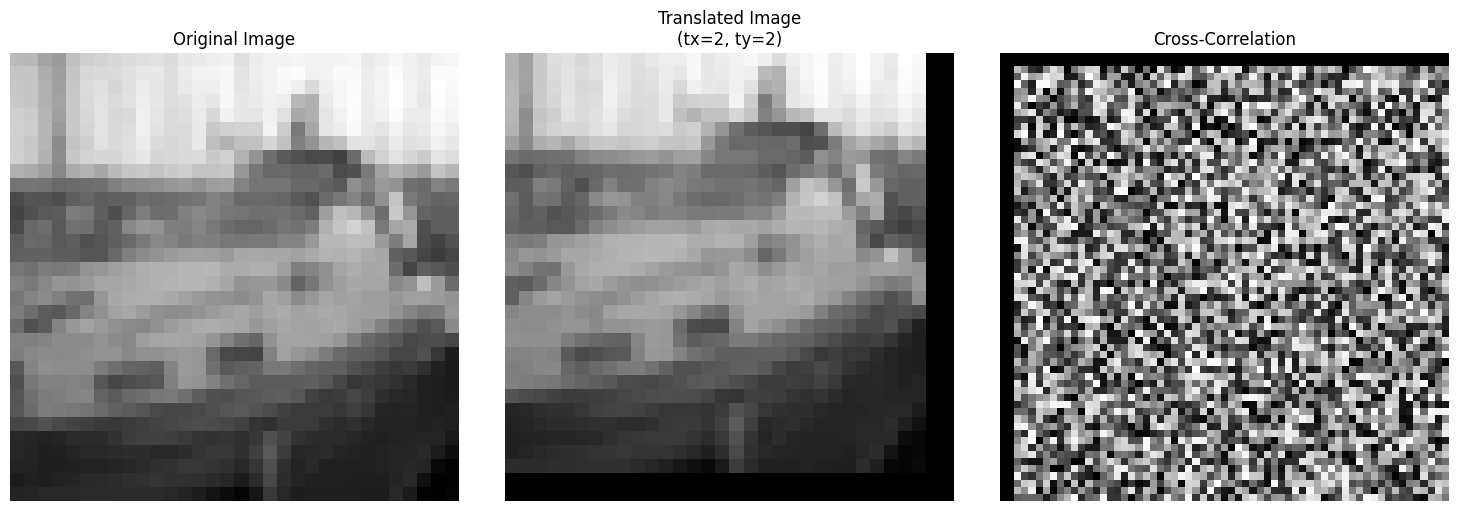

In [ ]:
from scipy.signal import correlate2d
sample_image, _ = cifar10[2]
sample_image_pil = Image.fromarray(np.array(sample_image))

# Translation parameters
tx = 2
ty = 2

# Translate the sample image
translated_image = translate_image(sample_image_pil, tx, ty)

# Convert both original and translated images to grayscale for correlation
sample_image_np = np.array(sample_image_pil.convert('L'))  # Convert to grayscale
translated_image_np = np.array(translated_image.convert('L'))  # Convert to grayscale

# Apply cross-correlation
correlation_result = correlate2d(sample_image_np, translated_image_np, mode='full') #the result includes all possible overlaps between the original and translated images. This helps capture the effect of shifting or drifting more clearly.

# Display the images and correlation result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
ax[0].imshow(sample_image_np, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Translated Image
ax[1].imshow(translated_image_np, cmap='gray')
ax[1].set_title(f"Translated Image\n(tx={tx}, ty={ty})")
ax[1].axis('off')

# Correlation Result
ax[2].imshow(correlation_result, cmap='gray')
ax[2].set_title("Cross-Correlation")
ax[2].axis('off')

plt.tight_layout()
plt.show()


##Cross-correlation:
1. Regular form
$$
C(u, v) = \sum_{x} \sum_{y} f(x, y) \cdot g(x - u, y - v)
$$
2. Normalized form
$$
NCC(u, v) = \frac{\sum_{x, y} \left( f(x, y) - \mu_f \right) \left( g(x - u, y - v) - \mu_g \right)}
{\sqrt{\sum_{x, y} \left( f(x, y) - \mu_f \right)^2 \sum_{x, y} \left( g(x - u, y - v) - \mu_g \right)^2}}
$$
3. Phase cross-correlation
$$
F(k_x, k_y) = \sum_{x=0}^{n} \sum_{y=0}^{m}
f(x, y) \cdot
\left[ \cos\left( 2\pi \left( \frac{k_x x}{n} + \frac{k_y y}{m} \right) \right)
- i \sin\left( 2\pi \left( \frac{k_x x}{n} + \frac{k_y y}{m} \right) \right) \right]
$$

Real shift: (tx=2, ty=2)
Normal Cross-Correlation: (tx=5, ty=4)
Normalized Cross-Correlation: (tx=2, ty=0)
Phase Cross-Correlation: (tx=2, ty=2)


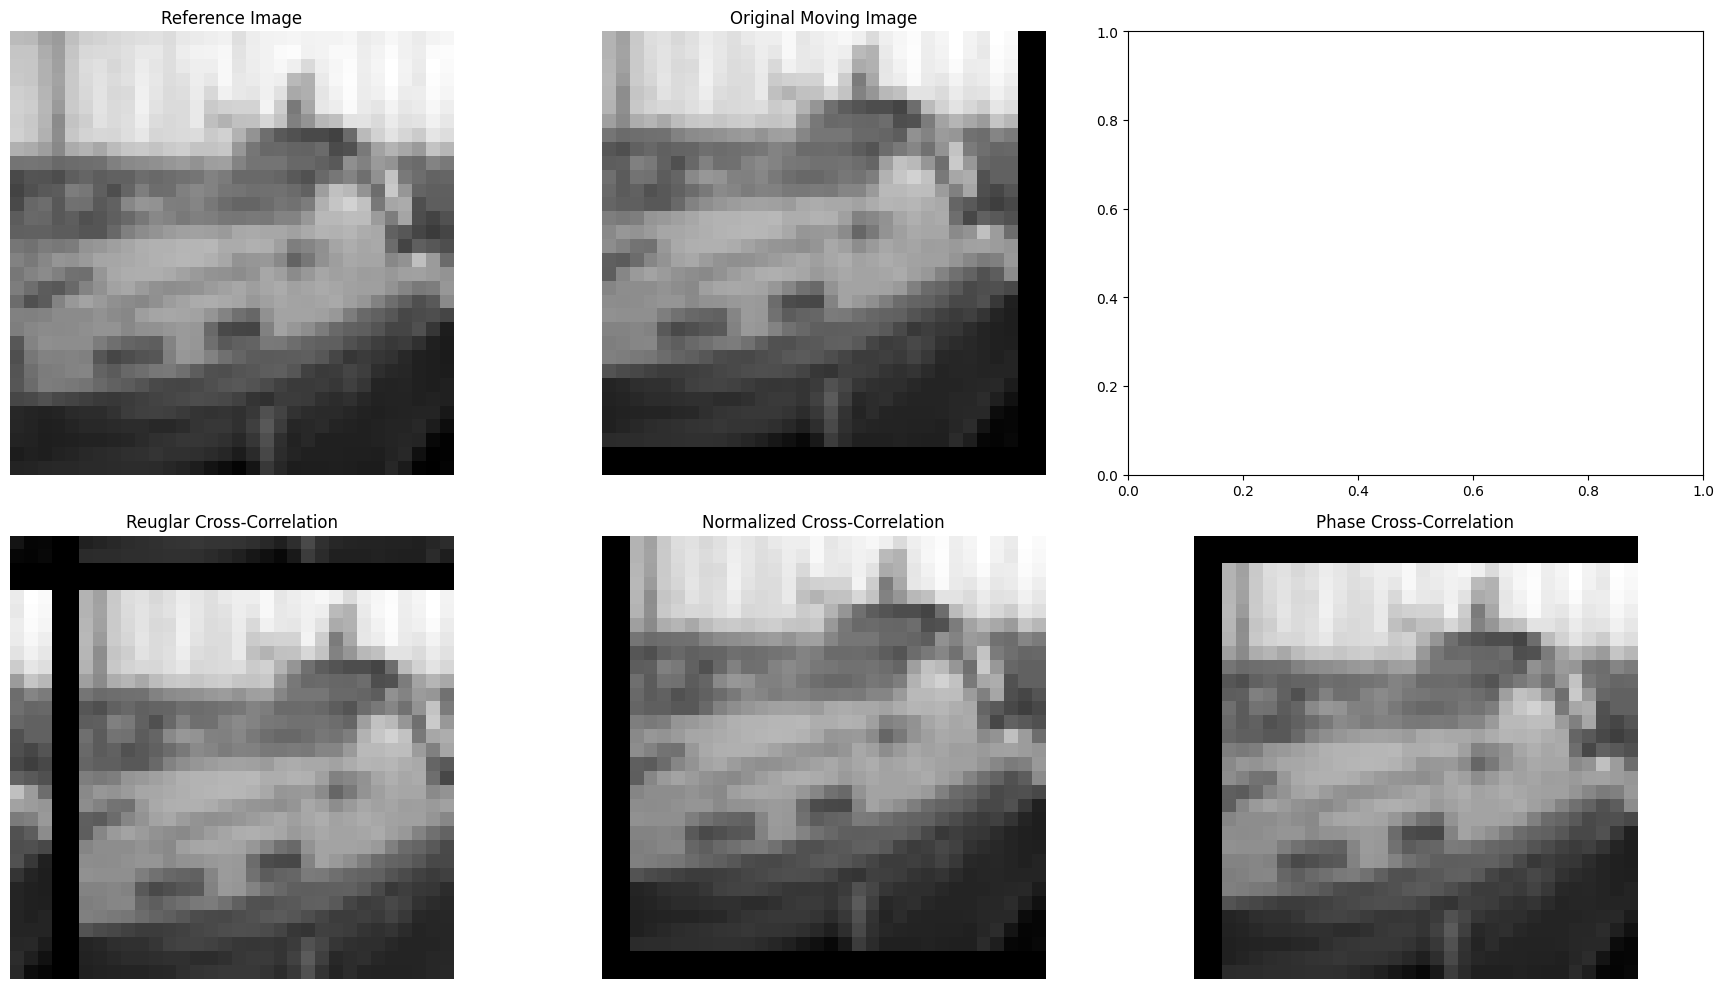

In [ ]:
from PIL import Image
from scipy.signal import correlate2d
from skimage.registration import phase_cross_correlation

# Convert images to grayscale and NumPy arrays
ref_img_np = np.array(sample_image_pil.convert('L'))  # Reference image in grayscale
mov_img_np = np.array(translated_image.convert('L'))  # Moving image in grayscale


def normal_cross_correlation(ref_img, mov_img):
    """Compute normal cross-correlation score."""
    return

def normalized_cross_correlation(ref_img, mov_img):
    """Compute normalized cross-correlation score."""
    numerator = 0 #your input
    denominator = 0 #your input
    return numerator / denominator
def phase_correlation(ref_img, mov_img):
    """Compute the optimal translation using phase cross-correlation."""
    shift, error, phasediff = phase_cross_correlation(ref_img, mov_img, upsample_factor=10)
    return int(shift[1]), int(shift[0])  # Return (tx, ty)

def brute_force_search(ref_img, mov_img, max_shift=10, metric='normal'):
    """Perform brute-force search for optimal translation using the specified metric."""
    best_score = -np.inf  # Initialize with a very low score
    best_tx, best_ty = 0, 0  # Initialize with no shift

    for tx in range(-max_shift, max_shift + 1):
        for ty in range(-max_shift, max_shift + 1):
            shifted_img = np.roll(mov_img, shift=ty, axis=0)  # Shift along y-axis
            shifted_img = np.roll(shifted_img, shift=tx, axis=1)  # Shift along x-axis
            if metric == 'normal':
                score = normal_cross_correlation(ref_img, shifted_img)
            elif metric == 'normalized':
                score = normalized_cross_correlation(ref_img, shifted_img)
            else:
                raise ValueError("Unsupported metric. Use 'normal' or 'normalized'.")

            if score > best_score:
                best_score = score
                best_tx, best_ty = tx, ty

    return best_tx, best_ty



# Step 1: Perform brute-force search using normal and normalized cross-correlation
optimal_tx_normal, optimal_ty_normal = brute_force_search(ref_img_np, mov_img_np, max_shift=10, metric='normal')
optimal_tx_norm, optimal_ty_norm = brute_force_search(ref_img_np, mov_img_np, max_shift=10, metric='normalized')

# Step 2: Perform phase cross-correlation
optimal_tx_phase, optimal_ty_phase = phase_correlation(ref_img_np, mov_img_np)
print(f"Real shift: (tx={tx}, ty={ty})")
print(f"Normal Cross-Correlation: (tx={optimal_tx_normal}, ty={optimal_ty_normal})")
print(f"Normalized Cross-Correlation: (tx={optimal_tx_norm}, ty={optimal_ty_norm})")
print(f"Phase Cross-Correlation: (tx={optimal_tx_phase}, ty={optimal_ty_phase})")

# Step 3: Apply the optimal translations
registered_normal = np.roll(mov_img_np, shift=optimal_ty_normal, axis=0)
registered_normal = np.roll(registered_normal, shift=optimal_tx_normal, axis=1)

registered_normalized = np.roll(mov_img_np, shift=optimal_ty_norm, axis=0)
registered_normalized = np.roll(registered_normalized, shift=optimal_tx_norm, axis=1)

registered_phase = np.roll(mov_img_np, shift=optimal_ty_phase, axis=0)
registered_phase = np.roll(registered_phase, shift=optimal_tx_phase, axis=1)

# --- Plot the results ---
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: Reference and Original Moving Image
ax[0, 0].imshow(ref_img_np, cmap='gray')
ax[0, 0].set_title("Reference Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(mov_img_np, cmap='gray')
ax[0, 1].set_title("Original Moving Image")
ax[0, 1].axis('off')

# Row 2: Results from Different Methods
ax[1, 0].imshow(registered_normal, cmap='gray')
ax[1, 0].set_title("Reuglar Cross-Correlation")
ax[1, 0].axis('off')

ax[1, 1].imshow(registered_normalized, cmap='gray')
ax[1, 1].set_title("Normalized Cross-Correlation")
ax[1, 1].axis('off')

ax[1, 2].imshow(registered_phase, cmap='gray')
ax[1, 2].set_title("Phase Cross-Correlation")
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()


# Masks NCC
$$
MNCC(u, v) =
\frac{
\sum_{x,y} M_f(x, y) M_g(x - u, y - v) \left( f(x, y) - \mu_f \right) \left( g(x - u, y - v) - \mu_g \right)
}{
\sqrt{
\sum_{x,y} M_f(x, y) \left( f(x, y) - \mu_f \right)^2 \cdot
\sum_{x,y} M_g(x - u, y - v) \left( g(x - u, y - v) - \mu_g \right)^2
}
}
$$

Known offset (row, col): (3, 2)
Detected pixel offset (row, col): [15. 15.]


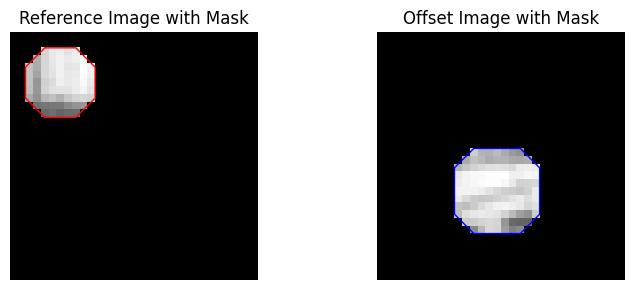

In [ ]:
from skimage import draw
from scipy.ndimage import shift as ndi_shift

# Define the known shift for testing
known_shift = (3, 2)


offset_image = ndi_shift(sample_image_np, shift=known_shift)
rr1, cc1 = draw.ellipse(6, 6, r_radius=5, c_radius=5, shape=sample_image_np.shape) # modify here
rr2, cc2 = draw.ellipse(20, 15, r_radius=6, c_radius=6, shape=offset_image.shape)# modify here
mask1 = np.zeros_like(sample_image_np, dtype=bool)
mask2 = np.zeros_like(offset_image, dtype=bool)
mask1[rr1, cc1] = True
sample_image_np*=mask1
mask2[rr2, cc2] = True
offset_image*=mask2

mncc_score, _, _ = phase_cross_correlation(
    sample_image_np, offset_image, reference_mask=mask1, moving_mask=mask2
)

print(f'Known offset (row, col): {known_shift}')
print(f'Detected pixel offset (row, col): {-mncc_score}')

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
ax1.imshow(sample_image_np, cmap='gray')
ax1.contour(mask1, colors='red', linewidths=1)
ax1.set_axis_off()
ax1.set_title('Reference Image with Mask')
ax2.imshow(offset_image, cmap='gray')
ax2.contour(mask2, colors='blue', linewidths=1)
ax2.set_axis_off()
ax2.set_title('Offset Image with Mask')
plt.tight_layout()
plt.show()


#SIFT registration

Keypoints in Reference Image: 12
Keypoints in Moving Image: 8
Keypoints in Reference Image: 12
Keypoints in Moving Image: 15
Keypoints in Reference Image: 12
Keypoints in Moving Image: 17
Keypoints in Reference Image: 12
Keypoints in Moving Image: 11


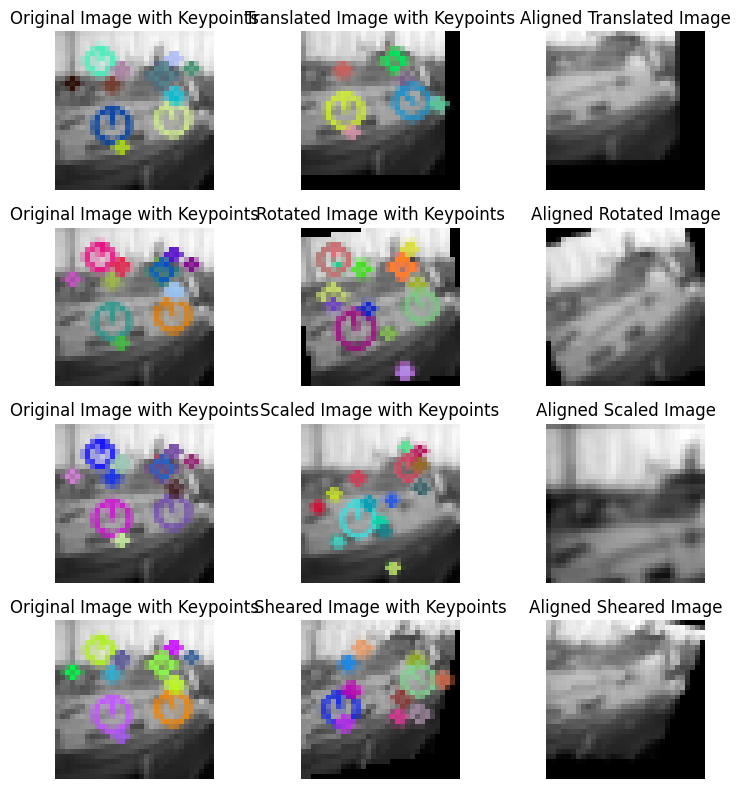

In [ ]:
import cv2

sample_image_np = np.array(sample_image_pil.convert('L'))

# Define the transformations
def translate_image(image, tx, ty):
    """Translate image by tx, ty pixels."""
    return image.transform(image.size, Image.AFFINE, (1, 0, tx, 0, 1, ty))

def rotate_image(image, angle):
    """Rotate image by a given angle."""
    return image.rotate(angle, resample=Image.BICUBIC)

def scale_image_properly(image, sx, sy):
    """Scale the image by factors sx, sy."""
    new_size = (int(image.width * sx), int(image.height * sy))
    return image.resize(new_size, resample=Image.BICUBIC)

def shear_image(image, shear_factor):
    """Shear the image."""
    return image.transform(
        image.size,
        Image.AFFINE, (1, shear_factor, 0, shear_factor, 1, 0)
    )

# Apply transformations to create new images
tx, ty = 3, 3  # Translation
rotation_angle = 10  # Rotation in degrees
scale_factor_x, scale_factor_y = 1.2, 1.2  # Scaling
shear_factor = 0.2  # Shearing

translated_image = translate_image(sample_image_pil, tx, ty)
rotated_image = rotate_image(sample_image_pil, rotation_angle)
scaled_image = scale_image_properly(sample_image_pil, scale_factor_x, scale_factor_y)
sheared_image = shear_image(sample_image_pil, shear_factor)

# Helper function: SIFT registration with keypoint visualization
def sift_registration(ref_img_np, mov_img_np):
    """Register images using SIFT and return the aligned image."""
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp1, desc1 = sift.detectAndCompute(ref_img_np, None)
    kp2, desc2 = sift.detectAndCompute(mov_img_np, None)

    # Print all keypoints
    print(f"Keypoints in Reference Image: {len(kp1)}")
    print(f"Keypoints in Moving Image: {len(kp2)}")

    # Draw keypoints on both images for visualization
    img_kp1 = cv2.drawKeypoints(ref_img_np, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_kp2 = cv2.drawKeypoints(mov_img_np, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Handle the case where no descriptors were found
    if desc1 is None or desc2 is None:
        print("Not enough descriptors for matching. Skipping registration.")
        return mov_img_np, img_kp1, img_kp2  # Return the original and keypoint images

    # Match features using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Estimate transformation matrix using matched keypoints
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    matrix, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

    # Warp the moving image using the estimated transformation matrix
    aligned_image = cv2.warpAffine(mov_img_np, matrix, (ref_img_np.shape[1], ref_img_np.shape[0]))

    return aligned_image, img_kp1, img_kp2

# Convert transformed PIL images to grayscale NumPy arrays
translated_np = np.array(translated_image.convert('L'))
rotated_np = np.array(rotated_image.convert('L'))
scaled_np = np.array(scaled_image.convert('L'))
sheared_np = np.array(sheared_image.convert('L'))

# Register transformed images to the original image and get keypoint images
aligned_translated, kp_ref1, kp_translated = sift_registration(sample_image_np, translated_np)
aligned_rotated, kp_ref2, kp_rotated = sift_registration(sample_image_np, rotated_np)
aligned_scaled, kp_ref3, kp_scaled = sift_registration(sample_image_np, scaled_np)
aligned_sheared, kp_ref4, kp_sheared = sift_registration(sample_image_np, sheared_np)

# Plot the original, transformed, and aligned images with keypoints
fig, ax = plt.subplots(4, 3, figsize=(8, 8))

# Display Original Image (with keypoints) in every first column
for i, kp_img in enumerate([kp_ref1, kp_ref2, kp_ref3, kp_ref4]):
    ax[i, 0].imshow(kp_img, cmap='gray')
    ax[i, 0].set_title("Original Image with Keypoints")
    ax[i, 0].axis('off')

# Display Transformed Images (with keypoints) in the second column
ax[0, 1].imshow(kp_translated, cmap='gray')
ax[0, 1].set_title("Translated Image with Keypoints")
ax[0, 1].axis('off')

ax[1, 1].imshow(kp_rotated, cmap='gray')
ax[1, 1].set_title("Rotated Image with Keypoints")
ax[1, 1].axis('off')

ax[2, 1].imshow(kp_scaled, cmap='gray')
ax[2, 1].set_title("Scaled Image with Keypoints")
ax[2, 1].axis('off')

ax[3, 1].imshow(kp_sheared, cmap='gray')
ax[3, 1].set_title("Sheared Image with Keypoints")
ax[3, 1].axis('off')

# Display Aligned Images in the third column
ax[0, 2].imshow(aligned_translated, cmap='gray')
ax[0, 2].set_title("Aligned Translated Image")
ax[0, 2].axis('off')

ax[1, 2].imshow(aligned_rotated, cmap='gray')
ax[1, 2].set_title("Aligned Rotated Image")
ax[1, 2].axis('off')

ax[2, 2].imshow(aligned_scaled, cmap='gray')
ax[2, 2].set_title("Aligned Scaled Image")
ax[2, 2].axis('off')

ax[3, 2].imshow(aligned_sheared, cmap='gray')
ax[3, 2].set_title("Aligned Sheared Image")
ax[3, 2].axis('off')

plt.tight_layout()
plt.show()


Keypoints in Reference Image: 791
Keypoints in Moving Image: 790
Keypoints in Reference Image: 791
Keypoints in Moving Image: 837
Keypoints in Reference Image: 791
Keypoints in Moving Image: 7627
Keypoints in Reference Image: 791
Keypoints in Moving Image: 614


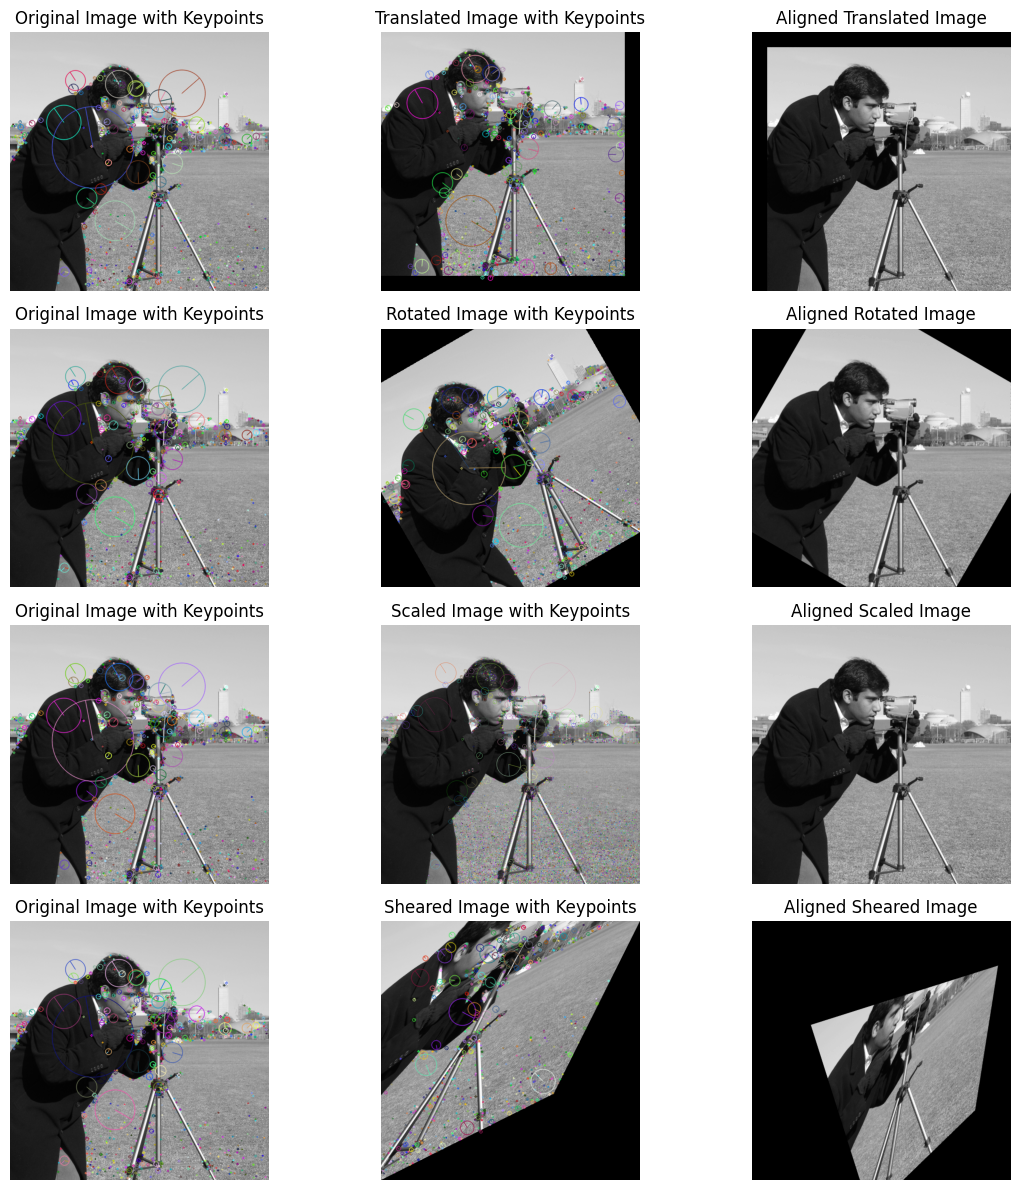

In [ ]:
sample_image_np = data.camera()  # Already a NumPy array
sample_image_pil = Image.fromarray(sample_image_np)
tx, ty = 30, 30
rotation_angle = 30
scale_factor_x, scale_factor_y = 3, 3
shear_factor = 0.5

translated_image = translate_image(sample_image_pil, tx, ty)
rotated_image = rotate_image(sample_image_pil, rotation_angle)
scaled_image = scale_image_properly(sample_image_pil, scale_factor_x, scale_factor_y)
sheared_image = shear_image(sample_image_pil, shear_factor)
translated_np = np.array(translated_image.convert('L'))
rotated_np = np.array(rotated_image.convert('L'))
scaled_np =  np.array(scaled_image.convert('L'))
sheared_np = np.array(sheared_image.convert('L'))

# Helper function: SIFT registration with matrix inversion for correct alignment
def sift_registration(ref_img_np, mov_img_np):
    """Register images using SIFT and return the aligned image."""
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors
    kp1, desc1 = sift.detectAndCompute(ref_img_np, None)
    kp2, desc2 = sift.detectAndCompute(mov_img_np, None)

    # Print keypoints
    print(f"Keypoints in Reference Image: {len(kp1)}")
    print(f"Keypoints in Moving Image: {len(kp2)}")

    # Draw keypoints for visualization
    img_kp1 = cv2.drawKeypoints(ref_img_np, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_kp2 = cv2.drawKeypoints(mov_img_np, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Handle the case where no descriptors are found
    if desc1 is None or desc2 is None:
        print("Not enough descriptors for matching. Skipping registration.")
        return mov_img_np, img_kp1, img_kp2

    # Match features using BFMatcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Estimate transformation matrix using matched keypoints
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    matrix, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

    # Invert the matrix to apply the correct alignment
    inverted_matrix = cv2.invertAffineTransform(matrix)

    # Warp the moving image using the inverted transformation matrix
    aligned_image = cv2.warpAffine(mov_img_np, inverted_matrix, (ref_img_np.shape[1], ref_img_np.shape[0]))

    return aligned_image, img_kp1, img_kp2

# Register transformed images and get keypoint images
aligned_translated, kp_ref1, kp_translated = sift_registration(sample_image_np, translated_np)
aligned_rotated, kp_ref2, kp_rotated = sift_registration(sample_image_np, rotated_np)
aligned_scaled, kp_ref3, kp_scaled = sift_registration(sample_image_np, scaled_np)
aligned_sheared, kp_ref4, kp_sheared = sift_registration(sample_image_np, sheared_np)

# Plot the original, transformed, and aligned images with keypoints
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

# Display Original Image with Keypoints in the first column
for i, kp_img in enumerate([kp_ref1, kp_ref2, kp_ref3, kp_ref4]):
    ax[i, 0].imshow(kp_img, cmap='gray')
    ax[i, 0].set_title("Original Image with Keypoints")
    ax[i, 0].axis('off')

# Display Transformed Images with Keypoints in the second column
ax[0, 1].imshow(kp_translated, cmap='gray')
ax[0, 1].set_title("Translated Image with Keypoints")
ax[0, 1].axis('off')

ax[1, 1].imshow(kp_rotated, cmap='gray')
ax[1, 1].set_title("Rotated Image with Keypoints")
ax[1, 1].axis('off')

ax[2, 1].imshow(kp_scaled, cmap='gray')
ax[2, 1].set_title("Scaled Image with Keypoints")
ax[2, 1].axis('off')

ax[3, 1].imshow(kp_sheared, cmap='gray')
ax[3, 1].set_title("Sheared Image with Keypoints")
ax[3, 1].axis('off')

# Display Aligned Images in the third column
ax[0, 2].imshow(aligned_translated, cmap='gray')
ax[0, 2].set_title("Aligned Translated Image")
ax[0, 2].axis('off')

ax[1, 2].imshow(aligned_rotated, cmap='gray')
ax[1, 2].set_title("Aligned Rotated Image")
ax[1, 2].axis('off')

ax[2, 2].imshow(aligned_scaled, cmap='gray')
ax[2, 2].set_title("Aligned Scaled Image")
ax[2, 2].axis('off')

ax[3, 2].imshow(aligned_sheared, cmap='gray')
ax[3, 2].set_title("Aligned Sheared Image")
ax[3, 2].axis('off')

plt.tight_layout()
plt.show()
